Laboratorio 8

Integrantes:
Bryann Alfaro 19372
Raul Jimenez 19017
Donaldo Garcia 19683

In [53]:


# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip



In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from pandas_profiling import ProfileReport

In [55]:
confirmed = pd.read_csv("confirmed.csv")
deaths = pd.read_csv("deaths.csv")
recovered = pd.read_csv("recovered.csv")

Colocar formato standard a columnas

In [56]:
confirmed = confirmed.rename(columns={"Province/State":"provincia", "Country/Region":"pais", "Lat":"latitud", "Long":"longitud"})
deaths = deaths.rename(columns={"Province/State":"provincia", "Country/Region":"pais", "Lat":"latitud", "Long":"longitud"})
recovered = recovered.rename(columns={"Province/State":"provincia", "Country/Region":"pais", "Lat":"latitud", "Long":"longitud"})


Dando formato Tidy

In [57]:
confirmed = confirmed.melt(id_vars=["provincia","pais","latitud","longitud"], var_name="date_info", value_name="confirmed")
deaths = deaths.melt(id_vars=["provincia","pais","latitud","longitud"], var_name="date_info", value_name="deaths")
recovered = recovered.melt(id_vars=["provincia","pais","latitud","longitud"], var_name="date_info", value_name="recovered")


Colocar formato Datetime en fechas

In [58]:
confirmed = confirmed.assign(fecha = pd.to_datetime(confirmed["date_info"], format="%m/%d/%y"))
confirmed.drop(columns=["date_info"], inplace=True)

deaths = deaths.assign(fecha = pd.to_datetime(deaths["date_info"], format="%m/%d/%y"))
deaths.drop(columns=["date_info"], inplace=True)

recovered = recovered.assign(fecha = pd.to_datetime(recovered["date_info"], format="%m/%d/%y"))
recovered.drop(columns=["date_info"], inplace=True)



Reordenar los datos

In [59]:
confirmed = confirmed.filter(["pais", "fecha", "provincia", "latitud", "longitud","confirmed"]).sort_values(["pais", "fecha"]).reset_index(drop=True)
deaths = deaths.filter(["pais", "fecha", "provincia", "latitud", "longitud","deaths"]).sort_values(["pais", "fecha"]).reset_index(drop=True)
recovered = recovered.filter(["pais", "fecha", "provincia", "latitud", "longitud", "recovered"]).sort_values(["pais", "fecha"]).reset_index(drop=True)


Merge

In [60]:
#Eliminar columnas de latitud y longitud en deaths y recovered para que no esten duplicadas en el dataframe final
deaths.drop(columns=["latitud","longitud"], inplace=True)
recovered.drop(columns=["latitud","longitud"], inplace=True)


In [61]:
#Realizando el merge

df_covid = (confirmed.merge(deaths, on=["pais","fecha","provincia"], how="left").merge(recovered, on=["pais","fecha","provincia"], how="left"))


Analisis exploratorios

In [62]:
#Observar primeros datos y shape
print(df_covid.head())
print(df_covid.shape)


          pais      fecha provincia   latitud   longitud  confirmed  deaths  \
0  Afghanistan 2020-01-22       NaN  33.93911  67.709953          0       0   
1  Afghanistan 2020-01-23       NaN  33.93911  67.709953          0       0   
2  Afghanistan 2020-01-24       NaN  33.93911  67.709953          0       0   
3  Afghanistan 2020-01-25       NaN  33.93911  67.709953          0       0   
4  Afghanistan 2020-01-26       NaN  33.93911  67.709953          0       0   

   recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
(289289, 8)


In [63]:
df_covid.tail()

,pais,fecha,provincia,latitud,longitud,confirmed,deaths,recovered
289284,Zimbabwe,2022-10-14,NaN,-19.015438,29.154857,257827,5605,0.0
289285,Zimbabwe,2022-10-15,NaN,-19.015438,29.154857,257827,5605,0.0
289286,Zimbabwe,2022-10-16,NaN,-19.015438,29.154857,257893,5606,0.0
289287,Zimbabwe,2022-10-17,NaN,-19.015438,29.154857,257893,5606,0.0
289288,Zimbabwe,2022-10-18,NaN,-19.015438,29.154857,257893,5606,0.0


In [64]:
#Se realiza el profiler
profile = ProfileReport(df_covid)
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


In [65]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289289 entries, 0 to 289288
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   pais       289289 non-null  object        
 1   fecha      289289 non-null  datetime64[ns]
 2   provincia  91091 non-null   object        
 3   latitud    287287 non-null  float64       
 4   longitud   287287 non-null  float64       
 5   confirmed  289289 non-null  int64         
 6   deaths     289289 non-null  int64         
 7   recovered  273273 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 19.9+ MB


In [66]:
#Se puede notar datos estadisticos y comprobar si los rangos parecen razonables
df_covid.describe()


,latitud,longitud,confirmed,deaths,recovered
count,287287.000000,287287.000000,2.892890e+05,2.892890e+05,2.732730e+05
mean,19.718719,22.182084,7.735100e+05,1.197861e+04,8.499635e+04
std,25.911394,77.735285,4.142184e+06,5.874870e+04,7.524059e+05
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,-1.000000e+00
25%,3.933900,-42.604300,4.260000e+02,2.000000e+00,0.000000e+00
50%,21.512583,20.939400,1.021000e+04,1.150000e+02,0.000000e+00
75%,40.463667,90.356300,1.734780e+05,2.477000e+03,1.625000e+03
max,71.706900,178.065000,9.702330e+07,1.065841e+06,3.097475e+07


In [67]:
#Se notan datos negativos en los recuperados, por lo que se deben eliminar para que no afecte
print(len(df_covid)) #datos antes
df_covid = df_covid.query("not(recovered<0)")
print(len(df_covid)) #datos despues

289289
289281


In [68]:
df_covid.isnull().sum()

pais              0
fecha             0
provincia    198198
latitud        2002
longitud       2002
confirmed         0
deaths            0
recovered     16016
dtype: int64

In [69]:
import numpy as np
#Se nota que los datos principales estan completos, en el caso de recuperados puede que al inicio este dato no se reportara , por lo que es aceptable.
vals ={"provincia":"", "latitud":np.NaN, "longitud":np.NaN, "recovered":0}
df_covid.fillna(value=vals)

,pais,fecha,provincia,latitud,longitud,confirmed,deaths,recovered
0,Afghanistan,2020-01-22,,33.939110,67.709953,0,0,0.0
1,Afghanistan,2020-01-23,,33.939110,67.709953,0,0,0.0
2,Afghanistan,2020-01-24,,33.939110,67.709953,0,0,0.0
3,Afghanistan,2020-01-25,,33.939110,67.709953,0,0,0.0
4,Afghanistan,2020-01-26,,33.939110,67.709953,0,0,0.0
...,...,...,...,...,...,...,...,...
289284,Zimbabwe,2022-10-14,,-19.015438,29.154857,257827,5605,0.0
289285,Zimbabwe,2022-10-15,,-19.015438,29.154857,257827,5605,0.0
289286,Zimbabwe,2022-10-16,,-19.015438,29.154857,257893,5606,0.0
289287,Zimbabwe,2022-10-17,,-19.015438,29.154857,257893,5606,0.0


In [70]:


# !pip install quickda



In [71]:
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *

In [72]:
#Se estandarizan los nombres de variables
df_covid = clean(df_covid, method="standardize")

Outlier Analysis - Boxplot


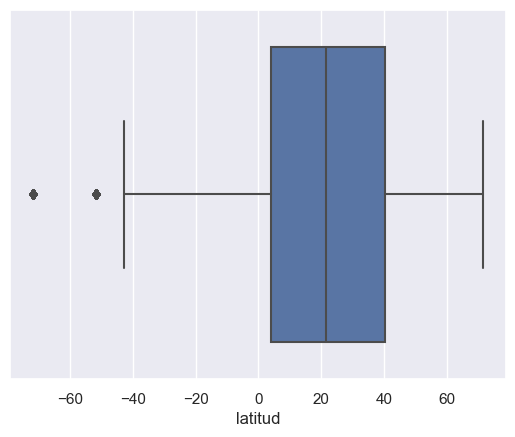

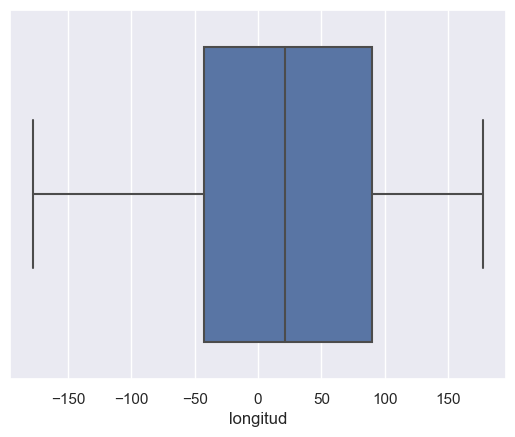

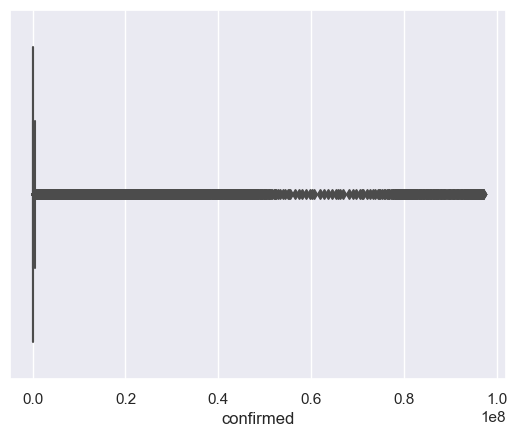

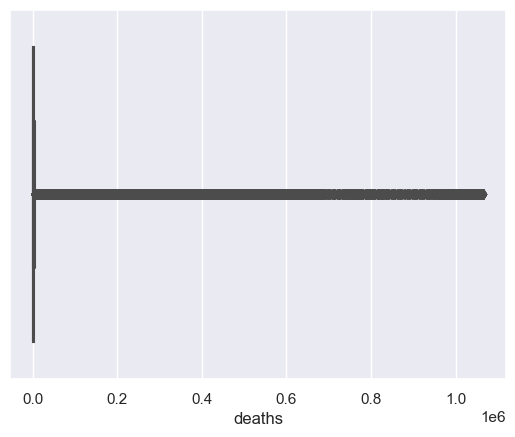

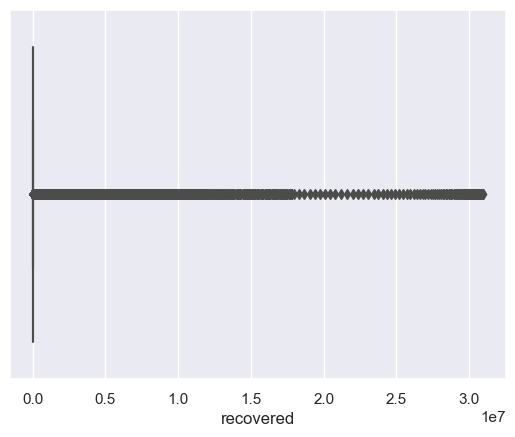

Distribution Analysis - Histogram


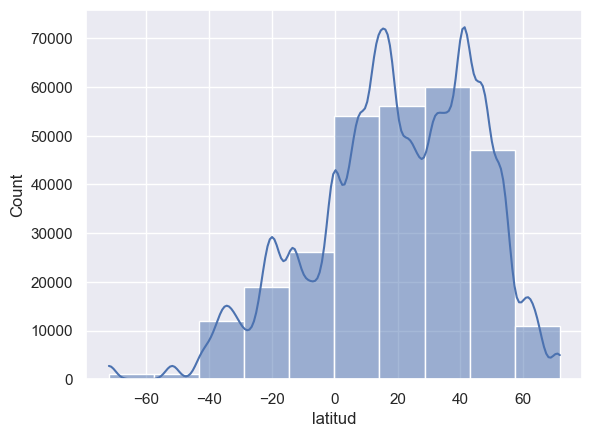

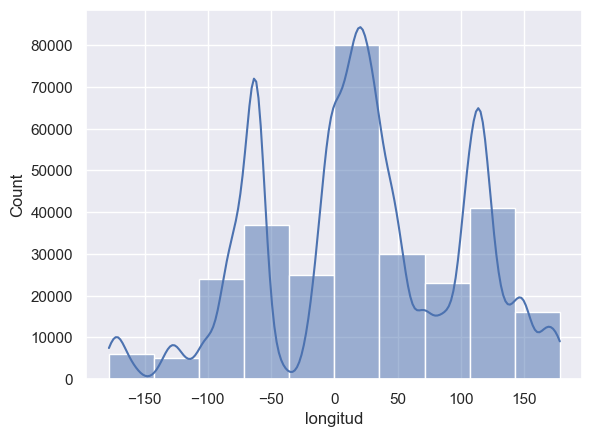

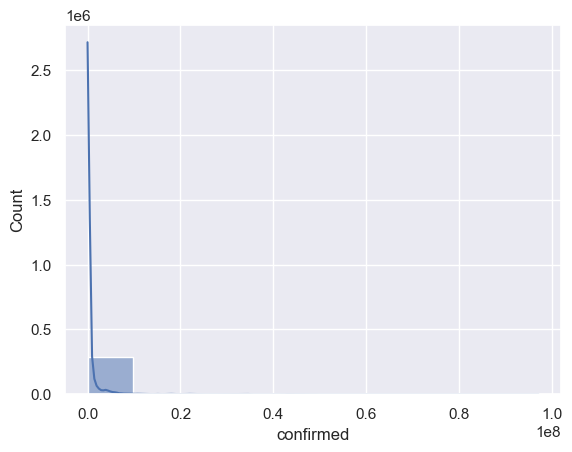

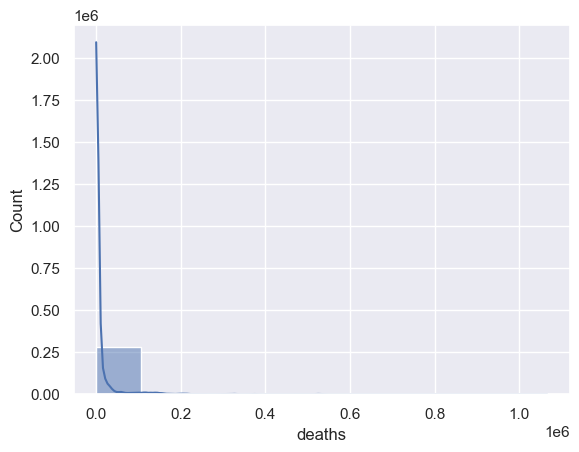

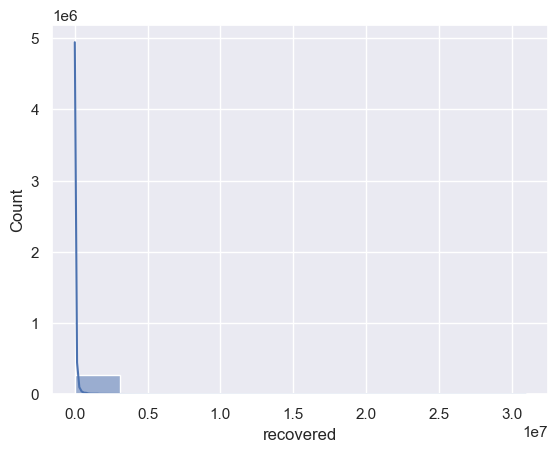

In [73]:
#Se hace boxplot de las numericas
eda_num(df_covid)

## casos nuevos por día

In [74]:
new_cases = (df_covid.sort_values(by=['pais', 'provincia', 'fecha']).filter(['pais', 'provincia', 'fecha', 'confirmed']))
new_cases = new_cases.groupby(['pais', 'provincia']).confirmed.diff()
new_cases.describe()


count    90992.000000
mean       209.856262
std       1604.273923
min     -53304.000000
25%          0.000000
50%          0.000000
75%          3.000000
max      92264.000000
Name: confirmed, dtype: float64

In [75]:
# asignar casos nuevos a data frame
df_covid = df_covid.assign(casos_nuevos=new_cases)

In [76]:
df_covid.describe()

,latitud,longitud,confirmed,deaths,recovered,casos_nuevos
count,287279.000000,287279.000000,2.892810e+05,2.892810e+05,2.732650e+05,90992.000000
mean,19.719947,22.186275,7.735314e+05,1.197894e+04,8.499884e+04,209.856262
std,25.910710,77.732310,4.142239e+06,5.874947e+04,7.524168e+05,1604.273923
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,0.000000e+00,-53304.000000
25%,3.933900,-42.604300,4.270000e+02,2.000000e+00,0.000000e+00,0.000000
50%,21.512583,20.939400,1.021000e+04,1.150000e+02,0.000000e+00,0.000000
75%,40.463667,90.356300,1.734910e+05,2.477000e+03,1.625000e+03,3.000000
max,71.706900,178.065000,9.702330e+07,1.065841e+06,3.097475e+07,92264.000000


## casos infectados

In [77]:
df_covid['infectados'] = df_covid['confirmed'] - df_covid['recovered'] - df_covid['deaths']

In [78]:
df_covid.tail()

,pais,fecha,provincia,latitud,longitud,confirmed,deaths,recovered,casos_nuevos,infectados
289284,Zimbabwe,2022-10-14,NaN,-19.015438,29.154857,257827,5605,0.0,NaN,252222.0
289285,Zimbabwe,2022-10-15,NaN,-19.015438,29.154857,257827,5605,0.0,NaN,252222.0
289286,Zimbabwe,2022-10-16,NaN,-19.015438,29.154857,257893,5606,0.0,NaN,252287.0
289287,Zimbabwe,2022-10-17,NaN,-19.015438,29.154857,257893,5606,0.0,NaN,252287.0
289288,Zimbabwe,2022-10-18,NaN,-19.015438,29.154857,257893,5606,0.0,NaN,252287.0


In [79]:
df_covid.describe()

,latitud,longitud,confirmed,deaths,recovered,casos_nuevos,infectados
count,287279.000000,287279.000000,2.892810e+05,2.892810e+05,2.732650e+05,90992.000000,2.732650e+05
mean,19.719947,22.186275,7.735314e+05,1.197894e+04,8.499884e+04,209.856262,7.153322e+05
std,25.910710,77.732310,4.142239e+06,5.874947e+04,7.524168e+05,1604.273923,4.138904e+06
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,0.000000e+00,-53304.000000,-1.638280e+05
25%,3.933900,-42.604300,4.270000e+02,2.000000e+00,0.000000e+00,0.000000,3.700000e+01
50%,21.512583,20.939400,1.021000e+04,1.150000e+02,0.000000e+00,0.000000,3.720000e+03
75%,40.463667,90.356300,1.734910e+05,2.477000e+03,1.625000e+03,3.000000,7.195700e+04
max,71.706900,178.065000,9.702330e+07,1.065841e+06,3.097475e+07,92264.000000,9.595746e+07


In [80]:
infectados = df_covid.filter(['infectados']).query('infectados < 0')
print(len(infectados))

1129


In [81]:
#Se notan datos negativos en los casos nuevos, por lo que se deben eliminar para que no afecte
print(len(df_covid)) #datos antes
df_covid = df_covid.query("not(casos_nuevos<0)")
print(len(df_covid)) #datos despues

289281
289104


In [82]:
#Se notan datos negativos en los infectados, por lo que se deben eliminar para que no afecte
print(len(df_covid)) #datos antes
df_covid = df_covid.query("not(infectados < 0)")
print(len(df_covid)) #datos despues

289104
287976


In [83]:
df_covid.describe()

,latitud,longitud,confirmed,deaths,recovered,casos_nuevos,infectados
count,285989.000000,285989.000000,2.879760e+05,2.879760e+05,2.719740e+05,90304.000000,2.719740e+05
mean,19.703254,22.227812,7.753097e+05,1.189247e+04,8.373425e+04,213.009534,7.187329e+05
std,25.887885,77.737633,4.151299e+06,5.873164e+04,7.527706e+05,1596.243705,4.148406e+06
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.933900,-42.604300,4.400000e+02,2.000000e+00,0.000000e+00,0.000000,4.000000e+01
50%,21.512583,20.939400,1.031600e+04,1.160000e+02,0.000000e+00,0.000000,3.840000e+03
75%,40.339900,90.356300,1.728202e+05,2.472000e+03,1.596750e+03,3.000000,7.282500e+04
max,71.706900,178.065000,9.702330e+07,1.065841e+06,3.097475e+07,92264.000000,9.595746e+07


## Normalización de los datos re-calculando todo en base de “por millón de habitantes"

In [87]:
# para normalizarlo dividimos las columnas de confirmed, deaths, recovered, casos_nuevos e infectados dentro de 1 millon
base_normalizadora = 1000000
df_covid['confirmed'] = df_covid['confirmed'] / base_normalizadora
df_covid['deaths'] = df_covid['deaths'] / base_normalizadora
df_covid['recovered'] = df_covid['recovered'] / base_normalizadora
df_covid['casos_nuevos'] = df_covid['casos_nuevos'] / base_normalizadora
df_covid['infectados'] = df_covid['infectados'] / base_normalizadora
df_covid

,pais,fecha,provincia,latitud,longitud,confirmed,deaths,recovered,casos_nuevos,infectados
0,Afghanistan,2020-01-22,NaN,33.939110,67.709953,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00
1,Afghanistan,2020-01-23,NaN,33.939110,67.709953,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00
2,Afghanistan,2020-01-24,NaN,33.939110,67.709953,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00
3,Afghanistan,2020-01-25,NaN,33.939110,67.709953,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00
4,Afghanistan,2020-01-26,NaN,33.939110,67.709953,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
289284,Zimbabwe,2022-10-14,NaN,-19.015438,29.154857,2.578270e-13,5.605000e-15,0.0,NaN,2.522220e-13
289285,Zimbabwe,2022-10-15,NaN,-19.015438,29.154857,2.578270e-13,5.605000e-15,0.0,NaN,2.522220e-13
289286,Zimbabwe,2022-10-16,NaN,-19.015438,29.154857,2.578930e-13,5.606000e-15,0.0,NaN,2.522870e-13
289287,Zimbabwe,2022-10-17,NaN,-19.015438,29.154857,2.578930e-13,5.606000e-15,0.0,NaN,2.522870e-13
